## Лабораторная работа 8.11 - ОДУ
### Вариант 4. Численное решение задачи двух тел

### Решение системы уравнений

$ x' = z $,

$ y' = u $,

$ z' = -\frac{x}{(x^2 + y^2)3/2} $

$ u' = - \frac{y}{(x^2 + y^2)3/2} $

### Начальные условия

$ x(0) = 0.5 $

$ y(0) = z(0) = 0 $

$ u(0) = \sqrt{3} \simeq 1.73 $

$ 0 <= t <= 20$

In [519]:

import matplotlib.pylab as plt
import math
import numpy as np
import scipy.optimize as op
%matplotlib inline

In [520]:
length = 20
h = 0.001 #шаг 
F1 = lambda z : z 
F2 = lambda u : u 
F3 = lambda x,y: -x/(x**2 + y**2)**(3/2) 
F4 = lambda x,y: -y/(x**2 + y**2)**(3/2)

### Явный метод Рунге-Кута

#### 4 ПОРЯДОК

In [521]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
t = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73

def runge_kutte_4th(x, y, z, u, t, h):
    k1=[0]*4
    k2=[0]*4
    k3=[0]*4
    k4=[0]*4
    
    size= int(20/h)
    for i in range(size):
            t[i] = h * i      
            
    for i in range(length-1):
        k1[0] = F1(z[i])
        k2[0] = F2(u[i])
        k3[0] = F3(x[i], y[i])
        k4[0] = F4(x[i], y[i])
            
        k1[1] = F1(z[i]+  h*k3[0]/2)
        k2[1] = F2(u[i] + h*k4[0]/2)
        k3[1] = F3(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
        k4[1] = F4(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
    
        k1[2] = F1(z[i] + h*k3[1]/2)
        k2[2] = F2(u[i] + h*k4[1]/2)
        k3[2] = F3(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)
        k4[2] = F4(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)

            
        k1[3] = F1(z[i] + h*k3[2])
        k2[3] = F2(u[i] + h*k4[2])
        k3[3] = F3(x[i] + h*k1[2] , y[i] + h*k2[2])
        k4[3] = F4(x[i] + h*k1[2] , y[i] + h*k2[2])

            
        x[i+1] = x[i] + h * (k1[0] + k1[1]*2 + k1[2]*2 + k1[3]) / 6
        y[i+1] = y[i] + h * (k2[0] + k2[1]*2 + k2[2]*2 + k2[3]) / 6
        z[i+1] = z[i] + h * (k3[0] + k3[1]*2 + k3[2]*2 + k3[3]) / 6
        u[i+1] = u[i] + h * (k4[0] + k4[1]*2 + k4[2]*2 + k4[3]) / 6
    
runge_kutte_4th(x, y, z, u, t, h)

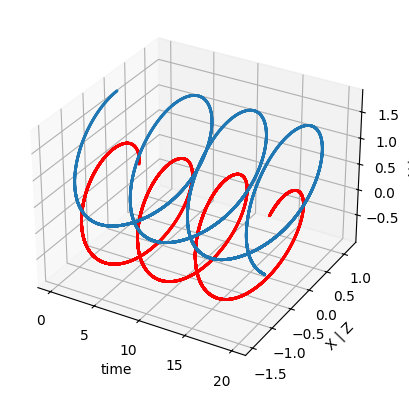

In [522]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(t ,x, y, s=1, c='red')
ax.scatter(t, z, u, s=1)
ax.set_xlabel('time')
ax.set_ylabel('X | Z')
ax.set_zlabel('Y | U');

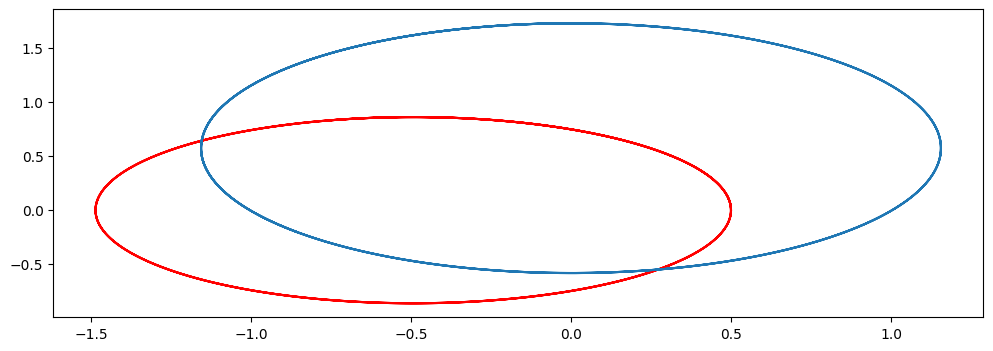

In [523]:
plt.figure(figsize = [12,4])
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.show()

#### 3 порядок

In [524]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)

x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]*3
k2=[0]*3
k3=[0]*3
k4=[0]*3


In [525]:
for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])
        
    k1[1] = F1(z[i]+  h*k3[0]/2)
    k2[1] = F2(u[i] + h*k4[0]/2)
    k3[1] = F3(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
    k4[1] = F4(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
   
    k1[2] = F1(z[i] + h*k3[1])
    k2[2] = F2(u[i] + h*k4[1])
    k3[2] = F3(x[i] + h*k1[1] , y[i] + h*k2[1])
    k4[2] = F4(x[i] + h*k1[1] , y[i] + h*k2[1])

           
    x[i+1] = x[i] + h * (k1[0] + k1[1]*4 + k1[2] ) / 6
    y[i+1] = y[i] + h * (k2[0] + k2[1]*4 + k2[2]) / 6
    z[i+1] = z[i] + h * (k3[0] + k3[1]*4 + k3[2]) / 6
    u[i+1] = u[i] + h * (k4[0] + k4[1]*4 + k4[2]) / 6

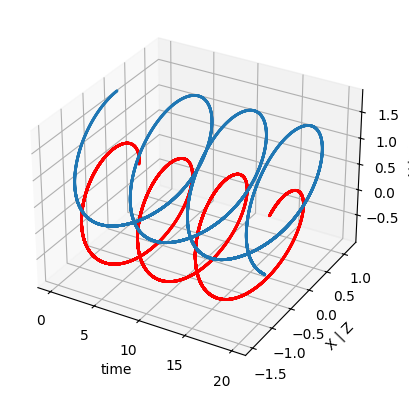

In [526]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(t ,x, y, s=1, c='red')
ax.scatter(t, z, u, s=1)
ax.set_xlabel('time')
ax.set_ylabel('X | Z')
ax.set_zlabel('Y | U');

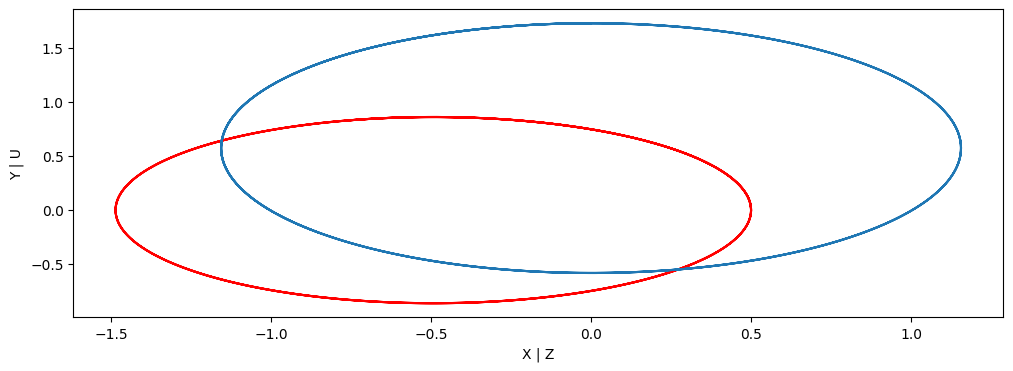

In [527]:
plt.figure(figsize = [12,4])
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.xlabel('X | Z')
plt.ylabel('Y | U')
plt.show()

#### 2 порядок

In [528]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]*2
k2=[0]*2
k3=[0]*2
k4=[0]*2

In [529]:
for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])
        
    k1[1] = F1(z[i]+  h*k3[0]/2)
    k2[1] = F2(u[i] + h*k4[0]/2)
    k3[1] = F3(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
    k4[1] = F4(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
   
           
    x[i+1] = x[i] + h * k1[1] 
    y[i+1] = y[i] + h * k2[1]
    z[i+1] = z[i] + h * k3[1]
    u[i+1] = u[i] + h * k4[1]

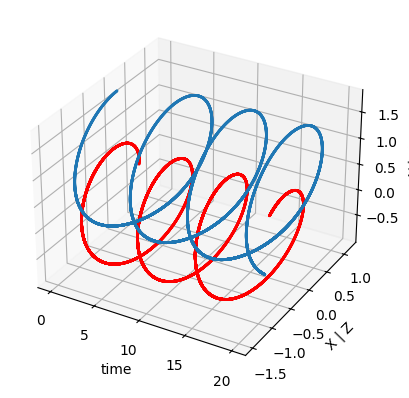

In [530]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(t ,x, y, s=1, c='red')
ax.scatter(t, z, u, s=1)
ax.set_xlabel('time')
ax.set_ylabel('X | Z')
ax.set_zlabel('Y | U');

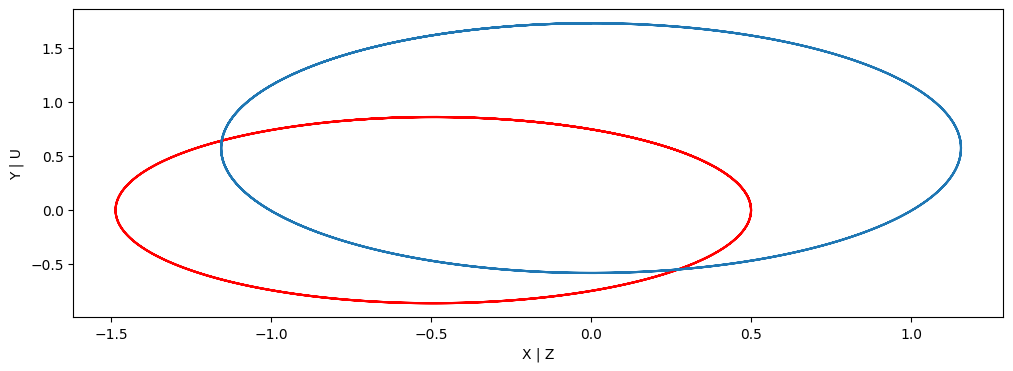

In [531]:
plt.figure(figsize = [12,4])
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.xlabel('X | Z')
plt.ylabel('Y | U')
plt.show()

#### 1 порядок

In [532]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]
k2=[0]
k3=[0]
k4=[0]

In [533]:
for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])

           
    x[i+1] = x[i] + h * k1[0] 
    y[i+1] = y[i] + h * k2[0]
    z[i+1] = z[i] + h * k3[0]
    u[i+1] = u[i] + h * k4[0]

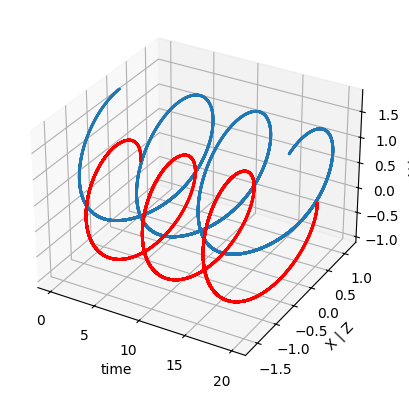

In [534]:
fig= plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(t ,x, y, s=1, c='red')
ax.scatter(t, z, u, s=1)
ax.set_xlabel('time')
ax.set_ylabel('X | Z')
ax.set_zlabel('Y | U');

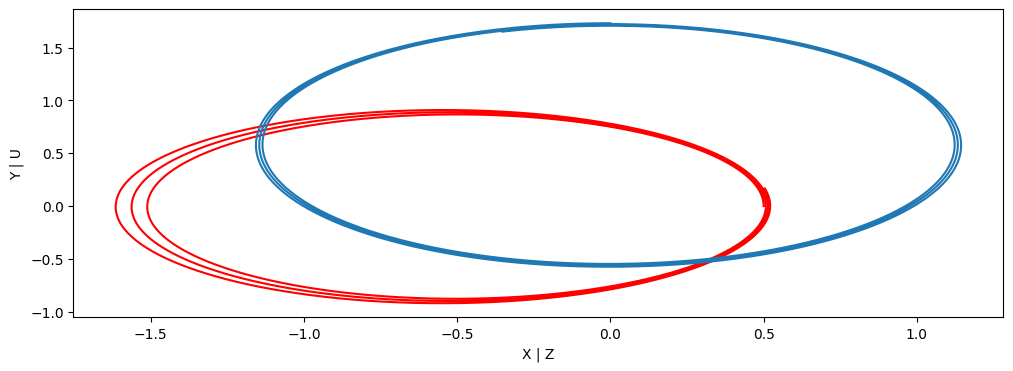

In [535]:
plt.figure(figsize = [12,4])
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.xlabel('X | Z')
plt.ylabel('Y | U')
plt.show()

Выше я привела решение при шаге h=0.001, а теперь попробую взять, например, для 1 и 4 порядка  h = 0.1 и h = 0.01

In [536]:
h = 0.01

length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
t = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]*4
k2=[0]*4
k3=[0]*4
k4=[0]*4

size= int(20/h)
for i in range(size):
        t[i] = h * i   
        
        
for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])
        
    k1[1] = F1(z[i]+  h*k3[0]/2)
    k2[1] = F2(u[i] + h*k4[0]/2)
    k3[1] = F3(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
    k4[1] = F4(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
   
    k1[2] = F1(z[i] + h*k3[1]/2)
    k2[2] = F2(u[i] + h*k4[1]/2)
    k3[2] = F3(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)
    k4[2] = F4(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)

           
    k1[3] = F1(z[i] + h*k3[2])
    k2[3] = F2(u[i] + h*k4[2])
    k3[3] = F3(x[i] + h*k1[2] , y[i] + h*k2[2])
    k4[3] = F4(x[i] + h*k1[2] , y[i] + h*k2[2])

        
    x[i+1] = x[i] + h * (k1[0] + k1[1]*2 + k1[2]*2 + k1[3]) / 6
    y[i+1] = y[i] + h * (k2[0] + k2[1]*2 + k2[2]*2 + k2[3]) / 6
    z[i+1] = z[i] + h * (k3[0] + k3[1]*2 + k3[2]*2 + k3[3]) / 6
    u[i+1] = u[i] + h * (k4[0] + k4[1]*2 + k4[2]*2 + k4[3]) / 6
    
x4= x
y4 = y
z4= z
u4= u


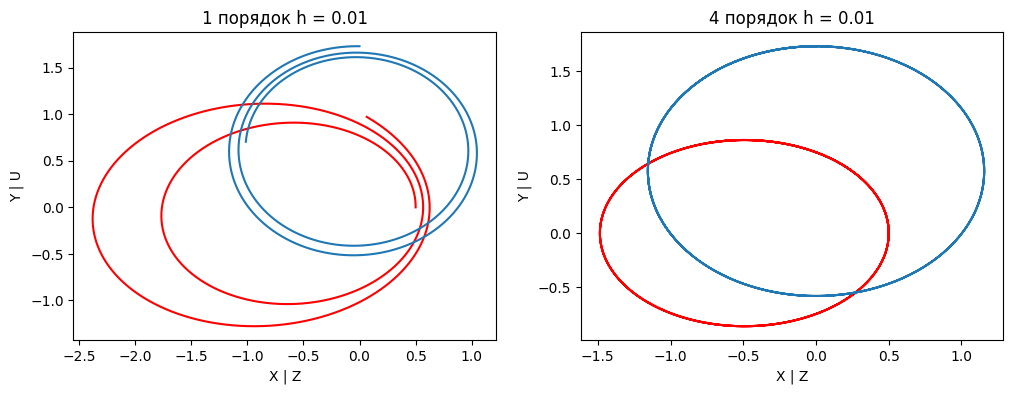

In [537]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]
k2=[0]
k3=[0]
k4=[0]

for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])

           
    x[i+1] = x[i] + h * k1[0] 
    y[i+1] = y[i] + h * k2[0]
    z[i+1] = z[i] + h * k3[0]
    u[i+1] = u[i] + h * k4[0]


plt.figure(figsize = [12,4])
plt.subplot(1,2,1)
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.xlabel('X | Z')
plt.ylabel('Y | U')
plt.title("1 порядок h = 0.01")
plt.subplot(1,2,2)
plt.plot(x4,y4, c='red')
plt.plot(z4,u4)
plt.title("4 порядок h = 0.01")
plt.xlabel('X | Z')
plt.ylabel('Y | U')

plt.show()


In [538]:
h = 0.1

length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
t = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]*4
k2=[0]*4
k3=[0]*4
k4=[0]*4

size= int(20/h)
for i in range(size):
        t[i] = h * i   
        
        
for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])
        
    k1[1] = F1(z[i]+  h*k3[0]/2)
    k2[1] = F2(u[i] + h*k4[0]/2)
    k3[1] = F3(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
    k4[1] = F4(x[i] + h*k1[0]/2 , y[i] + h*k2[0]/2)
   
    k1[2] = F1(z[i] + h*k3[1]/2)
    k2[2] = F2(u[i] + h*k4[1]/2)
    k3[2] = F3(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)
    k4[2] = F4(x[i] + h*k1[1]/2 , y[i] + h*k2[1]/2)

           
    k1[3] = F1(z[i] + h*k3[2])
    k2[3] = F2(u[i] + h*k4[2])
    k3[3] = F3(x[i] + h*k1[2] , y[i] + h*k2[2])
    k4[3] = F4(x[i] + h*k1[2] , y[i] + h*k2[2])

        
    x[i+1] = x[i] + h * (k1[0] + k1[1]*2 + k1[2]*2 + k1[3]) / 6
    y[i+1] = y[i] + h * (k2[0] + k2[1]*2 + k2[2]*2 + k2[3]) / 6
    z[i+1] = z[i] + h * (k3[0] + k3[1]*2 + k3[2]*2 + k3[3]) / 6
    u[i+1] = u[i] + h * (k4[0] + k4[1]*2 + k4[2]*2 + k4[3]) / 6
    
        
x4= x
y4 = y
z4= z
u4= u



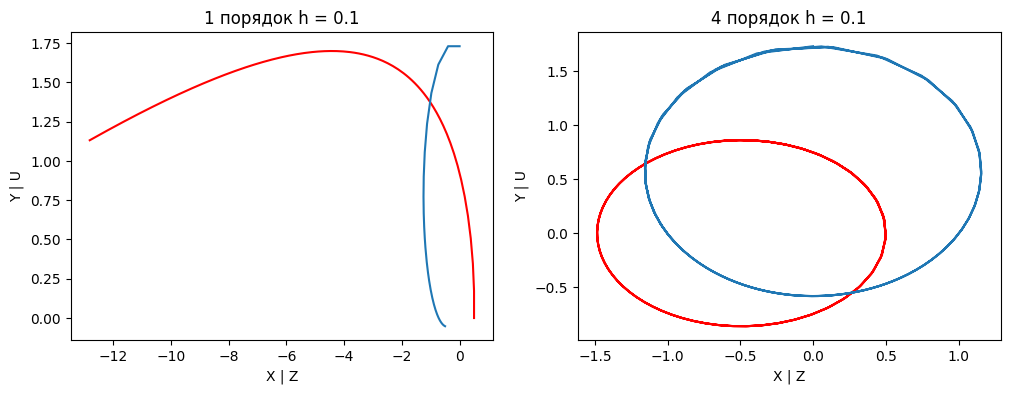

In [539]:
length = int(20/h)
x = [0]*(length)
y = [0]*(length)
z = [0]*(length)
u = [0]*(length)
x[0]=0.5
y[0]=0
z[0]=0
u[0]=1.73
k1=[0]
k2=[0]
k3=[0]
k4=[0]

for i in range(length-1):
    k1[0] = F1(z[i])
    k2[0] = F2(u[i])
    k3[0] = F3(x[i], y[i])
    k4[0] = F4(x[i], y[i])

           
    x[i+1] = x[i] + h * k1[0] 
    y[i+1] = y[i] + h * k2[0]
    z[i+1] = z[i] + h * k3[0]
    u[i+1] = u[i] + h * k4[0]


plt.figure(figsize = [12,4])
plt.subplot(1,2,1)
plt.plot(x,y, c='red')
plt.plot(z,u)
plt.xlabel('X | Z')
plt.ylabel('Y | U')
plt.title("1 порядок h = 0.1")
plt.subplot(1,2,2)
plt.plot(x4,y4, c='red')
plt.plot(z4,u4)
plt.title("4 порядок h = 0.1")
plt.xlabel('X | Z')
plt.ylabel('Y | U')

plt.show()

По мере уменьшения шага h картина становится все точнее и точнее. При h=0.001 картинки даже практически идентичны для всех порядков от 1 до 4.

In [540]:
y0 = np.array( [0.5, 0, 0, 1.73])

def f(t, y_vec):
    x, y, z, u = y_vec
    result = [
        z,
        u,
        -x/(x**2 + y**2)**(3/2),
        -y/(x**2 + y**2)**(3/2),
    ]

    return np.array(result)

f(1, np.array([0.5, 0.1, 0.1, 1.73]))

array([ 0.1       ,  1.73      , -3.77146414, -0.75429283])

In [541]:
def partial(f, x, var_index, h):
    dim = len(x)
    vec_h = np.zeros(dim)
    vec_h[var_index] = h
    return (f(x+vec_h) - f(x-vec_h)) / (2*h)

def get_Jacobi(f, x, h):
    dim = len(f(x))
    J = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            J[i][j] = partial(lambda x: f(x)[i], x, j, h[i])
    return J

def solve_system_Newton(f, x0, n_iter, precision, bl, tr):
    dim = len(f(x0))
    h = [np.min([np.abs(x0[i] - bl[i]), np.abs(x0[i] - tr[i])]) for i in range(dim)]
    x = x0
    diff = []
    for i in range(n_iter):
        old_x = x
        x = x - np.matmul(np.linalg.inv(get_Jacobi(f, x, h)), f(x))
        d = np.abs(x - old_x)
        h = d
        d_norm = np.linalg.norm(d, ord=np.inf)
        diff.append(d_norm)
        if d_norm < precision:
            break
    return x, diff

In [542]:
def multistep_Runge_Kutte(t0, y0, h, f, n_iter):
    t = t0
    y = y0
    result_t = [t]
    result_y = [y]

    for i in range(n_iter):
        k1 = f(t        , y)
        k2 = f(t + 1/2*h, y + 1/2*k1*h)
        k3 = f(t + 1/2*h, y + 1/2*k2*h)
        k4 = f(t +     h, y +     k3*h)
        y = y + h*(1/6*k1 + 1/3*k2 + 1/3*k3 + 1/6*k4)

        t += h
        result_t.append(t)
        result_y.append(y)

    return np.array(result_t), np.array(result_y)

In [543]:
def draw_result(res_t, res_y):
    x, y, z, u = res_y.transpose()

    fig, axes = plt.subplots(2, figsize=(10, 10))

    axes[0].scatter(res_t, x, label='x', s=5)
    axes[0].scatter(res_t, y, label='y', s=5)
    axes[0].scatter(res_t, z, label='z', s=5)
    axes[0].scatter(res_t, u, label='u', s=5)

    axes[1].scatter([0], [0], label='center', s=20, color='red')
    axes[1].scatter(x, y, label='trajectory', s=5)

    N = len(res_t)
    for i in [1, N//2, N//3, N//4, N//5, N-1]:
        axes[1].arrow(x[i], y[i], z[i]/2, u[i]/2, color='orange', head_width=0.03)

    xlim = axes[1].get_xlim()
    axes[1].set_xlim(xlim[0]*1.2, xlim[1]*1.2)

    axes[1].legend()
    axes[0].legend()

### Метод Адамса

#### 3 порядок

In [546]:
def multistep_Adams_3th(t0, y0, h, f, n_iter=None, t_end=None):
    
    if n_iter is None:
        n_iter = math.ceil((t_end - 0) / h)
        
    # Начальные итерации проведем методом Рунге-Кутта.
    result_t, result_y = multistep_Runge_Kutte(t0, y0, h, f, n_iter=2)
    result_t = list(result_t)
    result_y = list(result_y)
    saved_f  = []
    for i in range(3):
        saved_f.append(f(result_t[i], result_y[i]))

    t = result_t[2]
    y = result_y[2]
    for i in range(2, n_iter):
        y = y + h*(23/12*saved_f[i] - 16/12*saved_f[i-1] + 5/12*saved_f[i-2])

        t += h
        result_t.append(t)
        result_y.append(y)
        saved_f.append(f(t, y))

    return np.array(result_t), np.array(result_y)


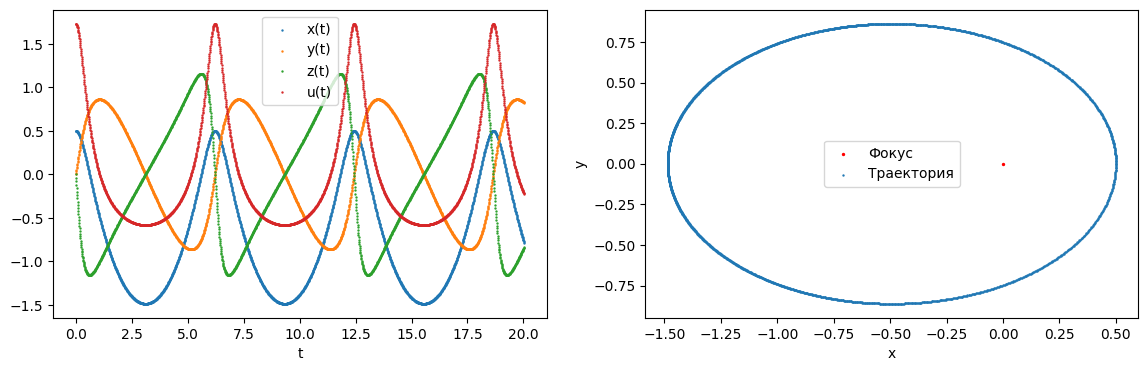

In [548]:
result_t, result_y = multistep_Adams_3th(0, y0, 0.02, f, 12)
draw_result(result_t, result_y)

### Метод Формул Дифференцирования Назад (ФДН)

#### 3 порядок

In [ ]:
def BDF_3th(t0, y0, h, f, n_iter=None):
    
    # Начальные итерации проведем методом Рунге-Кутта.
    result_t, result_y = multistep_Runge_Kutte(t0, y0, h, f, n_iter=2)

    deviation = np.max(2*np.add.accumulate(np.abs(result_y))[-1])

    result_t = list(result_t)
    result_y = list(result_y)

    t = result_t[2]
    y = result_y[2]
    for i in range(2, n_iter):
        func = lambda arg: arg - 18/11*result_y[i] + 9/11*result_y[i-1] - 2/11*result_y[i-2] - h*6/11*f(t, arg)
        y, _ = solve_system_Newton(func, y, 10, 1e-4, y-deviation, y+deviation)

        t += h
        result_t.append(t)
        result_y.append(y)
        
    return np.array(result_t), np.array(result_y)

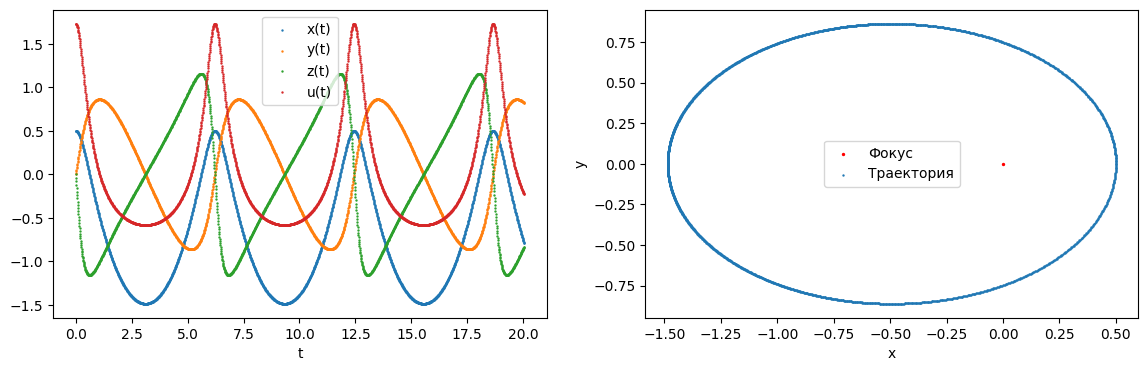

In [551]:
result_t, result_y = BDF_3th(0, y0, 0.02, f, 12)
draw_result(result_t, result_y)